# READING AND CLEANING THE DATA

In [41]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import csv
from matplotlib import pyplot as plt
import nltk
import spacy
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\com\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
data = pd.read_csv("TripAdvisor_English_Reviews_Seoul_Hotels.csv")
print(data.shape)
data.head()

(50178, 7)


,Hotel,Title,Date,Reviewer,Location,Rating,Review
0,9Brick_Hotel,Love the look,Date of stay: December 2022,ChristelleNg wrote a review Jan 2023,"Singapore, Singapore",40,Location not too bad. Near the Hongik station....
1,9Brick_Hotel,Very bad experience,Date of stay: December 2022,Molly123 wrote a review Dec 2022,NaN,10,I asked the hotel to provide another set of co...
2,9Brick_Hotel,Chic design,Date of stay: October 2019,wamysdottir wrote a review Apr 2020,"Copenhagen, Denmark",40,A clean boutique hotel conveniently located wi...
3,9Brick_Hotel,Great location but weak service standards,Date of stay: December 2019,worldtraveller wrote a review Dec 2019,NaN,30,Let me start with what I like about the hotel....
4,9Brick_Hotel,Never better,Date of stay: November 2019,Hui Yingg wrote a review Nov 2019,"Sydney, Australia",40,This hotel exceeded my expectations in terms o...


#### Combine Title and Reviews Columns

In [3]:
data["Review_cmplt"] = data["Title"]+" "+ data["Review"]
data.drop(["Title","Review"], axis = 1, inplace = True)
data.head()

,Hotel,Date,Reviewer,Location,Rating,Review_cmplt
0,9Brick_Hotel,Date of stay: December 2022,ChristelleNg wrote a review Jan 2023,"Singapore, Singapore",40,Love the look Location not too bad. Near the H...
1,9Brick_Hotel,Date of stay: December 2022,Molly123 wrote a review Dec 2022,NaN,10,Very bad experience I asked the hotel to provi...
2,9Brick_Hotel,Date of stay: October 2019,wamysdottir wrote a review Apr 2020,"Copenhagen, Denmark",40,Chic design A clean boutique hotel convenientl...
3,9Brick_Hotel,Date of stay: December 2019,worldtraveller wrote a review Dec 2019,NaN,30,Great location but weak service standards Let ...
4,9Brick_Hotel,Date of stay: November 2019,Hui Yingg wrote a review Nov 2019,"Sydney, Australia",40,Never better This hotel exceeded my expectatio...


#### Checking for null values 

In [4]:
data.isna().sum()

Hotel              0
Date              90
Reviewer           0
Location        9189
Rating             0
Review_cmplt       3
dtype: int64

In [5]:
#Since dropping a small number will not affect the dataset, I will drop the rows with null values for Review_complt column.

#will deal with Location and Date column later

data.dropna(subset=['Review_cmplt'],inplace = True)
data.isna().sum()

Hotel              0
Date              90
Reviewer           0
Location        9188
Rating             0
Review_cmplt       0
dtype: int64

#### Cleaning Data:

1. In the Date column, remove "Date of stay"
2. Keep only English words in Review_complt column
3. Keep only name of the reviewer
4. Make a column for the date of the review written
5. Keep only the country name in the location column
6. Get the ratings out of 5

In [6]:
# Defining functions to clean the data

def clean_date(text):
    try:
        return re.sub(r'Date of stay:', "",text).strip()
    except:
        return None

def clean_reviews(text):
    """
    This will remove only the non english characters and not anything else including punctuation marks.
    Punctuation marks and capital letter play an important role in Sentiment Analysis.
    """
    text = re.sub("[^A-Za-z0-9|\(\)\,\!\[\]\'\"\.\-\{\}\?]+", " ", text)
    return text.strip()

def get_name(text):
    #gets only the name from the Reviewer column
    return text.split("wrote ")[0].strip()


def generate_date(text):
    #gets the date when the review was written from Reviewer column
    return text.split("wrote a review")[1].strip()

def get_country(text):
    
    if text is not None:
        try:
            return text.split(",")[1].strip()
        except:
            return text #ceratin locations have only country
    
def get_rating(rating):
    return rating/10 

In [7]:
clean_date("Date of stay: February 2020")

'February 2020'

In [8]:
data["Review_cmplt"][1067]

'位置方便，但房間有點暗 位置方便，弘大又是機場線，來回機場也非常方便。不好的是房間燈不太夠，一直覺得很暗。地方很夠，二個大行李都可以放得下！very nice room！location is also very good! Shopping,eating,everything nearby hotel, within 10minutes ! Will be come and stay at this hotel again.'

In [9]:
clean_reviews(data["Review_cmplt"][1067])

'very nice room location is also very good! Shopping,eating,everything nearby hotel, within 10minutes ! Will be come and stay at this hotel again.'

In [10]:
# Applying the functions to our dataset

data["reviewer_name"]= data["Reviewer"].apply(get_name)
data["country"]= data["Location"].apply(get_country)
data["rating"]= data["Rating"].apply(get_rating)
data["date_of_stay"] = data["Date"].apply(clean_date)
data["date_review_written"]= data["Reviewer"].apply(generate_date)
data["clean_reviews"] = data["Review_cmplt"].apply(clean_reviews)
data.head()

,Hotel,Date,Reviewer,Location,Rating,Review_cmplt,reviewer_name,country,rating,date_of_stay,date_review_written,clean_reviews
0,9Brick_Hotel,Date of stay: December 2022,ChristelleNg wrote a review Jan 2023,"Singapore, Singapore",40,Love the look Location not too bad. Near the H...,ChristelleNg,Singapore,4.0,December 2022,Jan 2023,Love the look Location not too bad. Near the H...
1,9Brick_Hotel,Date of stay: December 2022,Molly123 wrote a review Dec 2022,NaN,10,Very bad experience I asked the hotel to provi...,Molly123,NaN,1.0,December 2022,Dec 2022,Very bad experience I asked the hotel to provi...
2,9Brick_Hotel,Date of stay: October 2019,wamysdottir wrote a review Apr 2020,"Copenhagen, Denmark",40,Chic design A clean boutique hotel convenientl...,wamysdottir,Denmark,4.0,October 2019,Apr 2020,Chic design A clean boutique hotel convenientl...
3,9Brick_Hotel,Date of stay: December 2019,worldtraveller wrote a review Dec 2019,NaN,30,Great location but weak service standards Let ...,worldtraveller,NaN,3.0,December 2019,Dec 2019,Great location but weak service standards Let ...
4,9Brick_Hotel,Date of stay: November 2019,Hui Yingg wrote a review Nov 2019,"Sydney, Australia",40,Never better This hotel exceeded my expectatio...,Hui Yingg,Australia,4.0,November 2019,Nov 2019,Never better This hotel exceeded my expectatio...


In [11]:
data.drop(["Date","Reviewer","Location","Rating","Review_cmplt"], axis = 1, inplace = True)
print(data.shape)
data.head()

(50175, 7)


,Hotel,reviewer_name,country,rating,date_of_stay,date_review_written,clean_reviews
0,9Brick_Hotel,ChristelleNg,Singapore,4.0,December 2022,Jan 2023,Love the look Location not too bad. Near the H...
1,9Brick_Hotel,Molly123,NaN,1.0,December 2022,Dec 2022,Very bad experience I asked the hotel to provi...
2,9Brick_Hotel,wamysdottir,Denmark,4.0,October 2019,Apr 2020,Chic design A clean boutique hotel convenientl...
3,9Brick_Hotel,worldtraveller,NaN,3.0,December 2019,Dec 2019,Great location but weak service standards Let ...
4,9Brick_Hotel,Hui Yingg,Australia,4.0,November 2019,Nov 2019,Never better This hotel exceeded my expectatio...


In [12]:
# saving this data
data.to_csv("Clean_TripAdvisor_English_Reviews_Seoul_Hotels.csv", index = False)

In [13]:
data.isna().sum()

Hotel                     0
reviewer_name             0
country                9188
rating                    0
date_of_stay             90
date_review_written       0
clean_reviews             0
dtype: int64

# EDA

### Plotting the Number of Yearly Reviews

In [14]:
#defining a function to get only the year from the given date

def get_years(text):
    text = re.sub("[^0-9]+", "",text)
    return text.strip()

#applying the function to our dataset

data["year"] = data["date_review_written"].apply(get_years)

data.head(3)

,Hotel,reviewer_name,country,rating,date_of_stay,date_review_written,clean_reviews,year
0,9Brick_Hotel,ChristelleNg,Singapore,4.0,December 2022,Jan 2023,Love the look Location not too bad. Near the H...,2023
1,9Brick_Hotel,Molly123,NaN,1.0,December 2022,Dec 2022,Very bad experience I asked the hotel to provi...,2022
2,9Brick_Hotel,wamysdottir,Denmark,4.0,October 2019,Apr 2020,Chic design A clean boutique hotel convenientl...,2020


In [15]:
yearly_reviews = pd.DataFrame(data["year"].value_counts()).sort_index()
yearly_reviews.columns = ['num_reviews']
yearly_reviews

,num_reviews
,9
1,6
2,5
2004,9
2005,46
2006,68
2007,131
2008,214
2009,504
2010,541


#### Note: Through EDA, it is known that the number of reviews above corresponding to  year 1,2,3,4, and no values are the reviews corresponding to year 2023. Since recent reviews (as of the date of scraping) had dates as "Yesterday"  etc. Thus we will merge all these reviews under 2023

In [16]:
yearly_reviews.loc["2023"] = [383]
yearly_reviews.drop(["1",'2','3','4',],axis = 0,inplace = True)
yearly_reviews.drop(index=yearly_reviews.index[0], axis=0, inplace=True)
yearly_reviews.reset_index(inplace=True)
yearly_reviews = yearly_reviews.rename(columns = {'index':'year'})
yearly_reviews

,year,num_reviews
0,2004,9
1,2005,46
2,2006,68
3,2007,131
4,2008,214
5,2009,504
6,2010,541
7,2011,1118
8,2012,2062
9,2013,3292


In [17]:
# for the sake of the plot, we will drop the year 2023 as well as the year has just started.
yearly_reviews.drop(index=yearly_reviews.index[-1], axis=0, inplace=True)
yearly_reviews

,year,num_reviews
0,2004,9
1,2005,46
2,2006,68
3,2007,131
4,2008,214
5,2009,504
6,2010,541
7,2011,1118
8,2012,2062
9,2013,3292


<Figure size 1440x720 with 0 Axes>

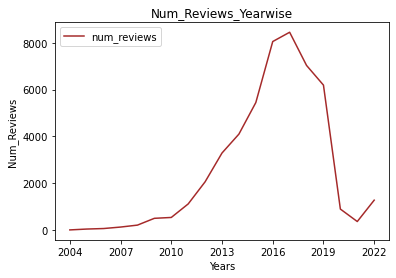

In [18]:
fig = plt.figure(figsize=(20,10))
yearly_reviews.plot(color="brown")
plt.title('Num_Reviews_Yearwise')
plt.xlabel("Years",)
plt.ylabel("Num_Reviews")
plt.xticks(np.arange(0, 19, step=3), ["2004","2007","2010","2013","2016","2019","2022"])
plt.savefig('Num_Reviews_Yearly.png',dpi=1200)
plt.show()

#### Inference: The number of online reviews showed a gradual increasing trend from year 2004 to 2016 and then it started falling down and towards 2019 it had a drastic fall. The number of reviews which are directly proportional to the number of guests are again showing positive growth as Covid restrictions are being lifted.

### Rating Analysis


Box plot of the ratings to see the distribution of ratings given by the reviewers to identify whether the ratings are normally distributed or skewed, and whether there are any outliers.

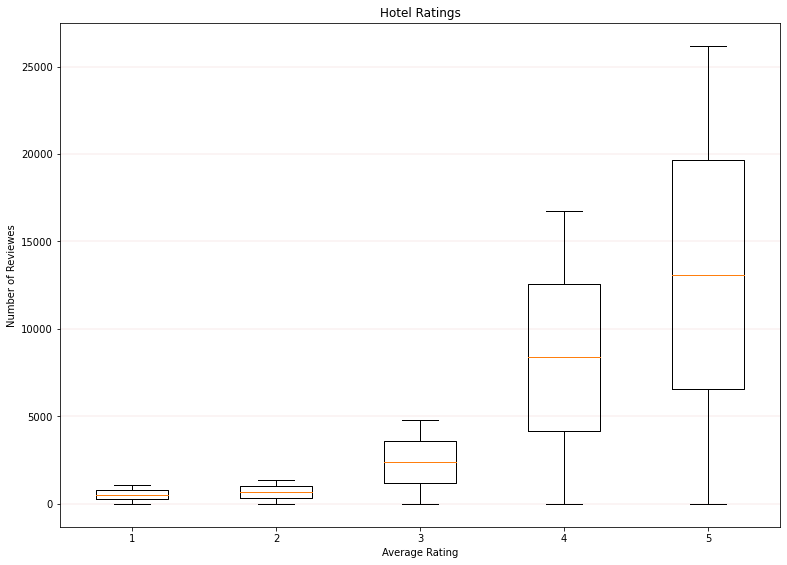

In [19]:
# Define the list of ratings

ratings = data["rating"].tolist()

#create datasets

data1 = np.arange(ratings.count(1))  
data2 = np.arange(ratings.count(2))  
data3 = np.arange(ratings.count(3))  
data4 = np.arange(ratings.count(4))
data5 = np.arange(ratings.count(5))

dataSet = [data1, data2, data3, data4,data5]  
  
figure = plt.figure(figsize =(10, 7))  
ax = figure.add_axes([0, 0, 1, 1]) 
ax.grid(color='indianred', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
bp = ax.boxplot(dataSet)

# Set the title and axis labels
plt.title('Hotel Ratings')
plt.xlabel('Average Rating')
plt.ylabel("Number of Reviewes")
plt.savefig('Hotel_Ratings.png',dpi=1200)

plt.show()  

#### Inference: The ratings are positively skewed. Thus in order to analyse the negative and postive aspects, the data should be seggregated accordingly.

### Reviewer Analysis

Analyzing the nationality of the reviewers to determine which countries the majority of guests come from. This can help hotel managers to tailor the marketing efforts to target those countries specifically.


In [20]:
nationality = data["country"].value_counts()
nationality.head(15)

Singapore         5799
China             3759
Australia         2278
United Kingdom    2116
California        1944
South Korea       1877
Malaysia          1340
Philippines       1296
Canada            1208
New York           911
Thailand           828
Indonesia          723
Japan              663
India              538
Texas              476
Name: country, dtype: int64

#### Analysing the number of reviews and the average rating by nationality of the reviewer. 

This can help you identify whether there are any significant differences in the reviews based on the nationality of the reviewer.


In [21]:
# Group the data by nationality and calculate the number of reviews and average rating
result = data.groupby('country').agg({'clean_reviews': 'count', 'rating': 'mean'}).sort_values("clean_reviews",ascending=False)

In [22]:
result = result.rename(columns={'clean_reviews': 'num_reviews', 'rating': 'avg_rating'}) 
result.head(10)

,num_reviews,avg_rating
country,,
Singapore,5799,4.243145
China,3759,4.179303
Australia,2278,4.312555
United Kingdom,2116,4.286389
California,1944,4.391461
South Korea,1877,4.261588
Malaysia,1340,4.288060
Philippines,1296,4.320216
Canada,1208,4.322848


#### Analyzing the dates of the reviews to determine if there are any trends in terms of when guests are most likely to visit the hotel.

<AxesSubplot:>

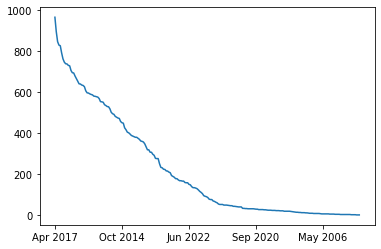

In [23]:
peak_seasons = data["date_review_written"].value_counts()
peak_seasons.plot()

In [58]:
head(data)

NameError: name 'head' is not defined

# SENTIMENT ANALYSIS using VADER

From Documentation: https://vadersentiment.readthedocs.io/en/latest/

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. 

VADER’s SentimentIntensityAnalyzer() takes in a string and returns a dictionary of scores in each of four categories:negative, neutral,positive, and compound(computed by normalizing the scores)

Vader sentiment not only tells if the statement is positive or negative but also the intensity of emotion.


### About the Scoring

The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a ‘normalized, weighted composite score’ is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

positive sentiment: compound score >= 0.5

neutral sentiment: (compound score > -0.5) and (compound score < 0.5)

negative sentiment: compound score <= -0.5

The pos, neu, and neg scores are ratios for proportions of text that fall in each category (so these should all add up to be 1… or close to it with float operation). These are the most useful metrics if you want multidimensional measures of sentiment for a given sentence.

In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [25]:
# Defining functions to get sentiments for each review in our dataset
# Code Help: https://jackmckew.dev/sentiment-analysis-text-cleaning-in-python-with-vader.html

def get_sentiment(text:str, analyser,desired_type:str='pos'):
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

def get_sentiment_scores(df,data_column):
    df[f'{data_column} Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,analyzer,'pos'))
    df[f'{data_column} Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,analyzer,'neg'))
    df[f'{data_column} Neutral Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,analyzer,'neu'))
    df[f'{data_column} Compound Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,analyzer,'compound'))
    return df

In [26]:
sentiment_scores = get_sentiment_scores(data,"clean_reviews")

In [27]:
sentiment_scores.sample(5)

,Hotel,reviewer_name,country,rating,date_of_stay,date_review_written,clean_reviews,year,clean_reviews Positive Sentiment Score,clean_reviews Negative Sentiment Score,clean_reviews Neutral Sentiment Score,clean_reviews Compound Sentiment Score
47053,The_Shilla_Seoul,Joan N,Singapore,4.0,December 2016,Jan 2017,"Comfortable luxurious, one of the best 5 star ...",2017,0.276,0.062,0.662,0.9977
23954,InterContinental_Seoul_COEX_an_IHG_Hotel,Mike K,Washington,4.0,July 2014,Jul 2014,Convenient location This was my first time to ...,2014,0.166,0.040,0.794,0.9849
17922,Hotel_Skypark_Central_Myeongdong,Ivy K,NaN,5.0,March 2015,Mar 2015,Very good choice I spend two nights with my mo...,2015,0.251,0.000,0.749,0.9333
19773,Ibis_Ambassador_Seoul_Insadong,TripMember06092015,United States,3.0,September 2014,Dec 2014,Typical modern Ibis good for leisure visitors ...,2014,0.128,0.015,0.857,0.9763
14566,Hotel_Kukdo,Frits H,Taiwan,5.0,February 2018,Mar 2018,Friendly service good comfort I had a really c...,2018,0.149,0.012,0.839,0.9966


In [28]:
# function to analyse

def vader_classifier(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

In [29]:
# Applying the classifier to our data

sentiment_scores["sentiment"] = sentiment_scores["clean_reviews Compound Sentiment Score"].apply(vader_classifier)

#Dropping not required columns

sentiment_scores.drop(["Hotel","reviewer_name","country","date_of_stay","date_review_written","year"], axis = 1, inplace = True)

In [30]:
sentiment_scores.sample(5)

,rating,clean_reviews,clean_reviews Positive Sentiment Score,clean_reviews Negative Sentiment Score,clean_reviews Neutral Sentiment Score,clean_reviews Compound Sentiment Score,sentiment
10575,5.0,Best Deal Ever I had a great sleep on a very l...,0.217,0.000,0.783,0.9577,Positive
18291,4.0,Conveniently located Located right in the midd...,0.078,0.048,0.874,0.4576,Neutral
22221,3.0,Somewhat of a letdown... I had such a fond mem...,0.055,0.060,0.884,0.0222,Neutral
13484,5.0,Awesome Hospitality service!! A belated review...,0.314,0.038,0.649,0.9803,Positive
8963,5.0,Amazing location and amazing food This hotel i...,0.183,0.016,0.801,0.9865,Positive


### Classified Reviews

In [31]:
# Function to print top scoring reviews for all the different types of sentiment and check if they make sense

def get_top_n_reviews(dataframe,column,num_rows):
    for index,row in dataframe.nlargest(num_rows,column).iterrows():
        print(f"Score: {row[column]}")
        print(f"Review: {row[1]}")
        print(" ")

In [32]:
get_top_n_reviews(sentiment_scores,"clean_reviews Positive Sentiment Score", 4)

Score: 0.741
Review: FANTASTIC the best place to stay in korea!!!!! Great Location, great room, great staff!!!! Amazing!!!!
 
Score: 0.715
Review: was perfect for me great!!! friendly staffs, fabulous lobby, yummy kitchen, professional service and nice location.
 
Score: 0.713
Review: Great location, outstanding service fabulous hotel, amazing breakfast buffet, well appointed rooms
 
Score: 0.699
Review: Amazing Stay Excellent service. Everything neat and clean. Beautiful Hotel. Friendly people. Highly Recommend. Center of the City. Clean. Neat. Beautiful. Accessible. Amazing Service. Near Shopping Malls. Good Location
 


In [33]:
get_top_n_reviews(sentiment_scores,"clean_reviews Negative Sentiment Score", 4)

Score: 0.445
Review: Bad Attitude Bad attitude, Bad behavior And Never Friendly of hotel staff. very disappointing with the hotel management and the staff. They never be friendly and talk rudely with the the hotel guests and customers.
 
Score: 0.425
Review: Rude, racist, unprofessional Rude, racist, unprofessional. And the female workers tried to sell themselves to me. It s a shame. The connected casino at the basement is also a disgrace to the entire place. It looks more like an underground illegal gambling den with equally low class dealers and it is very dirty with workers not even speaking English. It s appalling.
 
Score: 0.386
Review: Very expensive and dirty Location is great, very close to insangdong and Myeongdong. Food everything, but the hotel room is extremely DIRTY! The toilet is disgusting. Smelly, dirty with insects flying. I will not recommend this hotel to anyone of you. Horrible.
 
Score: 0.385
Review: Extremely poor I don't understand how rating system works in Kore

In [34]:
get_top_n_reviews(sentiment_scores,"clean_reviews Neutral Sentiment Score", 4)

Score: 1.0
Review: Convenience Location with Reasonable Price My first hotel choice everytime when I visit Seoul! Near Hongik University station, which is one of the airport railway stations and at the same time quite a big interchange station. Very convenience to get to the hotel from the airport when you're dragging a big luggage case, and also convenience for you to travel around in Seoul.
 
Score: 1.0
Review: Location is not convenience I suggest hotel should offer shuttle bus to nearby subway or sightseeing points.As I always need to take taxi as location is not convenience and the room rate is expensive when compare with other 5 stars hotel
 
Score: 1.0
Review: Average Price was high, staff at the front desk didnot speak much English, did not know what was the expectation from a business person.the prices were really very high. I still do not know how much points I got for my 5 days stay
 
Score: 1.0
Review: Locations location location A 4 star hotel located at the center of Seou

#### We can see above that the classifications are pretty good. So we will now proceed with further analysis of the data.

In [35]:
#counting the number of positive, negative and neutral reviews

vader_counts = sentiment_scores['sentiment'].value_counts()
vader_counts

Positive    45978
Neutral      2504
Negative     1693
Name: sentiment, dtype: int64

In [36]:
# Counting the length of the reviews and visualization

# Wordcounts for reviews
sentiment_scores["word_count"] = sentiment_scores["clean_reviews"].apply(lambda x: len(x.split()))

#Scaled wordcounts for better visualization

wc_mean = sentiment_scores["word_count"].mean()
wc_deviation = sentiment_scores["word_count"].std()

sentiment_scores["word_count_scaled"] = sentiment_scores["word_count"].apply(lambda x: (x-wc_mean)/wc_deviation)

print(f"Average Word Count = {wc_mean}")

sentiment_scores.sample(3)

Average Word Count = 126.9350274040857


,rating,clean_reviews,clean_reviews Positive Sentiment Score,clean_reviews Negative Sentiment Score,clean_reviews Neutral Sentiment Score,clean_reviews Compound Sentiment Score,sentiment,word_count,word_count_scaled
3785,4.0,Excellent new option in Seoul The Conrad is a ...,0.126,0.051,0.823,0.9907,Positive,503,3.139931
45563,5.0,Great place in Seoul! Great suites with an inc...,0.300,0.038,0.662,0.9490,Positive,49,-0.650714
42815,4.0,Home visit Large apartment with kitchen washin...,0.217,0.064,0.719,0.6962,Positive,31,-0.801004


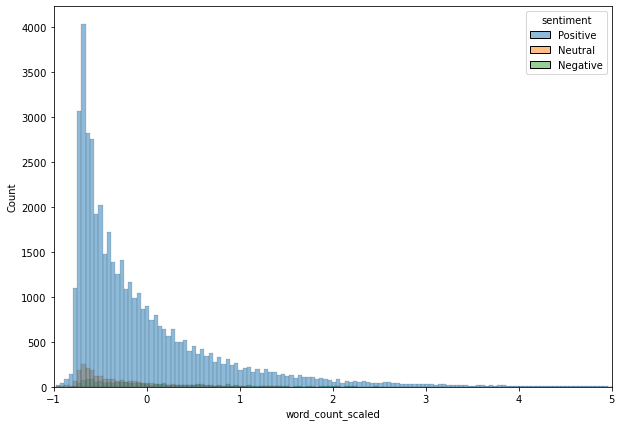

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.histplot(data=sentiment_scores, x="word_count_scaled", hue="sentiment", alpha=0.5)

plt.xlim(-1,5)

plt.show()

#### Since the data has high positivity biasness, it is better to analyse the data separately ("Postive","Neutral","Negative") in further analysis.

## Preprocessing the Data for WordClouds and Further Analysis

In [37]:
nlp = spacy.load("en_core_web_lg")

def preprocess(text):
    
    #keeps only letters
    text = re.sub("[^A-Za-z]+", " ", text)
    
    #lowers the text and create spacy object
    doc = nlp(text.lower())
    
    #stopwords
    stop_words = stopwords.words('english')
    new_stopwords = ["hotel","everything","anything","nothing","thing","need",
                     "good","great","excellent","perfect","much","even","really","well",
                     "one","nice","definitely"]  
    stop_words = stop_words+new_stopwords
    stop_words
 
    
    processed_text = []
    
    for token in doc:
        #remove stopwords and keeps only adverbs, adjectives, nouns,and verbs
        if (token.text in stop_words) or (token.pos_ not in ["ADJ","ADV","NOUN","VERB"]):
            pass
        else:
            processed_text.append(token.lemma_)  
            
    return " ".join(processed_text)

In [ ]:
sentiment_scores = pd.read_csv("Sentiment_Scores_TripAdvisor_English_Reviews_Seoul_Hotels.csv")
sentiment_scores.drop("preprocessed_reviews", axis = 1, inplace = True)
sentiment_scores.head(3)

In [39]:
text = sentiment_scores["clean_reviews"][3000]
text


'Very good business hotel Hotel with very good level of standards, ideal for business travel. As it is directly connected to a large shopping mall, no worries about forgotten items or lost luggage, and good variaty of places for dinner. Overall very solid price-quality ratio.'

In [42]:
preprocess(text)

'business level standard ideal business travel directly connect large shopping mall worry forget item lose luggage variaty place dinner overall solid price quality ratio'

In [43]:
# Cleaning the data
sentiment_scores["preprocessed_reviews"] = sentiment_scores["clean_reviews"].apply(preprocess)
sentiment_scores.sample(3)

,rating,clean_reviews,clean_reviews Positive Sentiment Score,clean_reviews Negative Sentiment Score,clean_reviews Neutral Sentiment Score,clean_reviews Compound Sentiment Score,sentiment,word_count,word_count_scaled,preprocessed_reviews
44451,4.0,An affordable hotel near to Myeongdong This ho...,0.137,0.017,0.845,0.9333,Positive,97,-0.249941,affordable near locate right next shopping are...
27283,5.0,"Great location, customer service and facilitie...",0.142,0.048,0.810,0.9798,Positive,241,0.952378,location customer service facility stay night ...
20672,4.0,A Good place to Start Our first time in Seoul ...,0.182,0.000,0.818,0.9741,Positive,130,0.025591,place start first time style place start compa...


In [45]:
# Word cloud of all the reviews

import matplotlib.pyplot as plt

from wordcloud import WordCloud

def plot_wordcloud(series,output_filename='wordcloud'):
    
    wordcloud = WordCloud(collocations = False,
                          background_color = "white",
                          width=1600, 
                          height=800, 
                          margin=2,
                          min_font_size=20).generate(' '.join(series.astype(str)))

    wordcloud.to_file(output_filename + '.png')
    
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.figtext(.5,.8,output_filename,fontsize = 60, ha='center')
    return plt.show()     

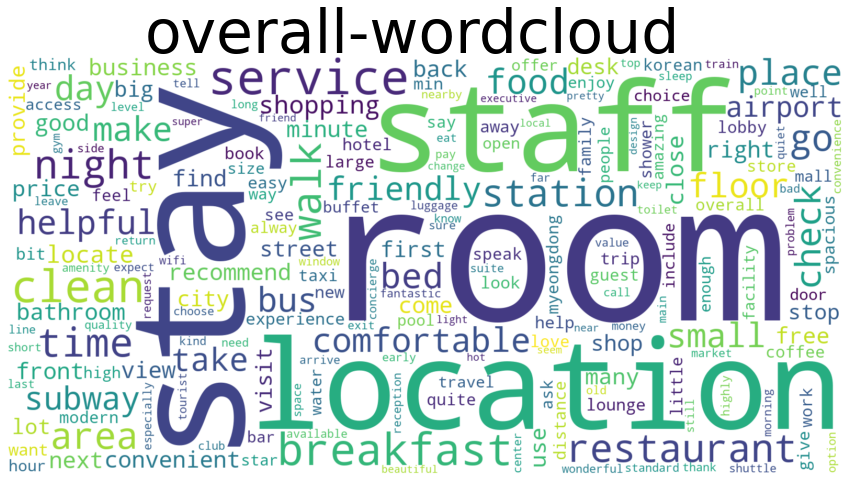

In [46]:
plot_wordcloud(sentiment_scores["preprocessed_reviews"],'overall-wordcloud')

In [48]:
#Function for the wordclouds by Positivity, Negativity, and Neutrality

def plot_wordcloud_top_n(df,num_reviews,score_column,data_column,output_filename):
    
    sliced_df = df.nlargest(num_reviews,score_column)

    plot_wordcloud(sliced_df[data_column],output_filename)

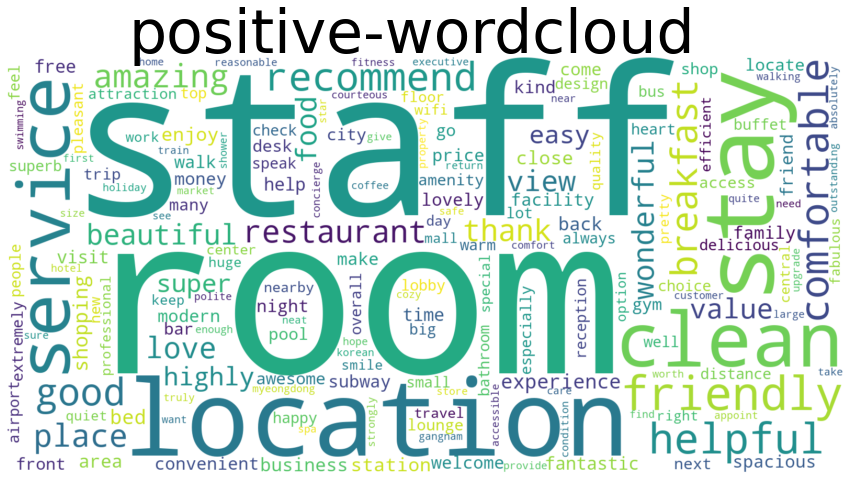

In [49]:
plot_wordcloud_top_n(sentiment_scores,1000,'clean_reviews Positive Sentiment Score','preprocessed_reviews','positive-wordcloud')

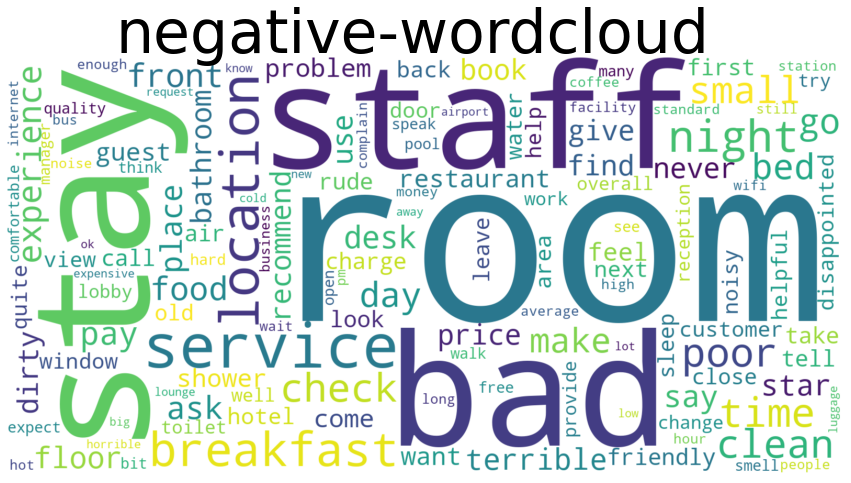

In [50]:
plot_wordcloud_top_n(sentiment_scores,1000,'clean_reviews Negative Sentiment Score','preprocessed_reviews','negative-wordcloud')

In [51]:
## Dividing the DataFrame into Three

df_positive_sen = sentiment_scores[sentiment_scores['sentiment']=='Positive']
df_negative_sen = sentiment_scores[sentiment_scores['sentiment']=='Negative']
df_neutral_sen =sentiment_scores[sentiment_scores['sentiment']=='Neutral']

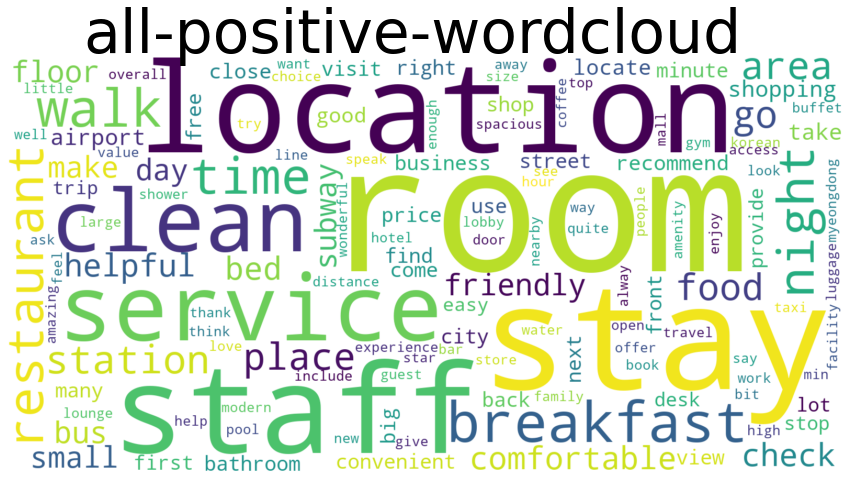

In [52]:
plot_wordcloud(df_positive_sen["preprocessed_reviews"],'all-positive-wordcloud')

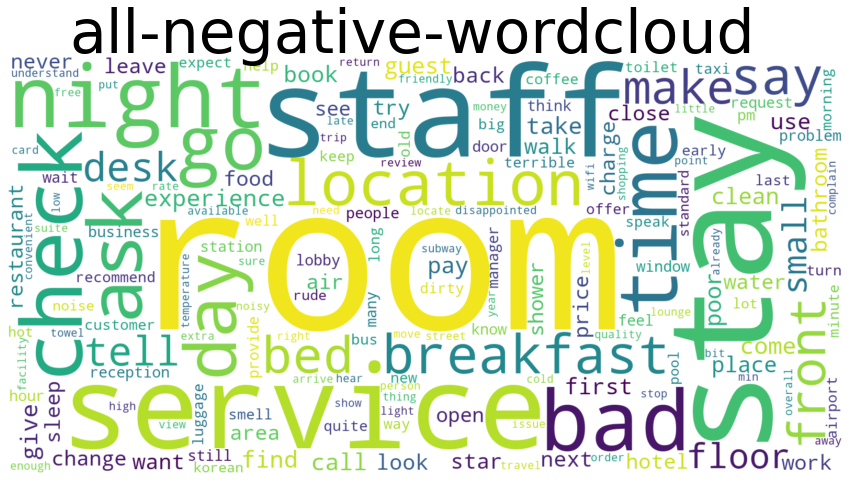

In [53]:
plot_wordcloud(df_negative_sen["preprocessed_reviews"],'all-negative-wordcloud')

In [54]:
# saving the sentiment_scores for future use

sentiment_scores.to_csv("Sentiment_Scores_TripAdvisor_English_Reviews_Seoul_Hotels.csv", index = False)